# List 3

## Implementation of  random graph structures:

- random graph (Erdos - Renyi)
- Watts-Strogatz model
- Barabasi Alberts

 

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import random

## random graph

def rand(N, p):
    vertices = range(N)
    G = nx.Graph()

    edge_list = []

    for i in range(len(vertices)):
        for j in range(len(vertices)):
            if random.random() < p:
                edge_list.append((i,j))
                
    G.add_edges_from(edge_list)
    
    return G

def draw(G):
    nx.draw(G, node_size = 5, alpha = 0.1)
    plt.show()

In [2]:
def graph_distribution_info(G, name):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    davg = np.mean(degree_sequence)
    dvar = np.var(degree_sequence)
    
    print(f'Max Degree of a {name} = {dmax}')
    print(f'Average Degree of a {name} = {davg}')
    print(f'Variance of a Degree destribution = {dvar}')
    
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=33)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=5)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
    ax0.set_title(f"Connected components of {name}")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

In [3]:
G_rand = rand(2000, 0.2)

Max Degree of a random graph = 789
Average Degree of a random graph = 719.823
Variance of a Degree destribution = 469.54667099999995


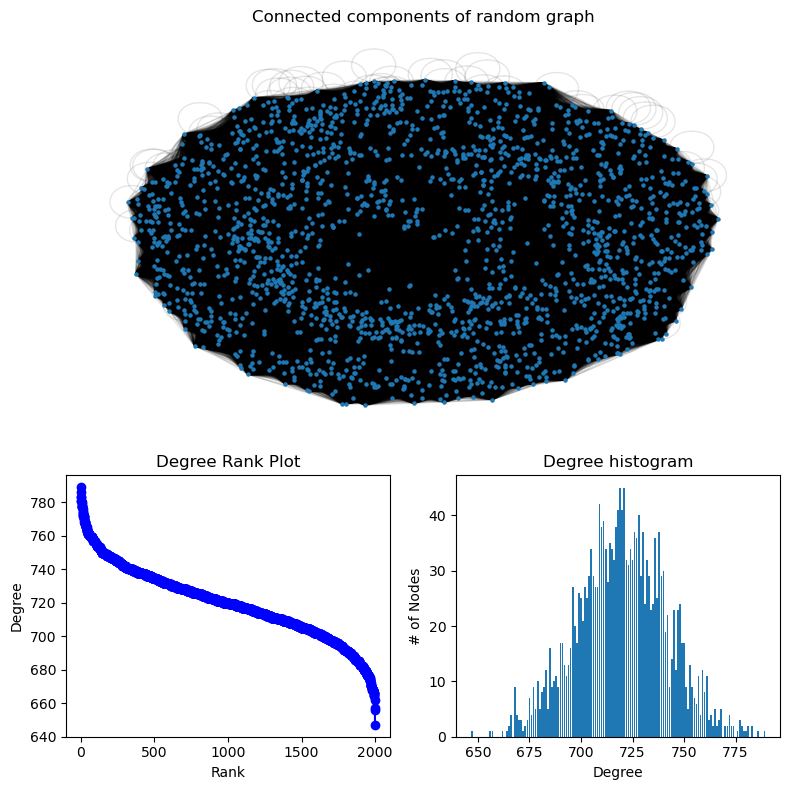

In [4]:
graph_distribution_info(G_rand, 'random graph')

## Random graph v2

Max Degree of a random graph = 65
Average Degree of a random graph = 39.526
Variance of a Degree destribution = 41.785323999999996


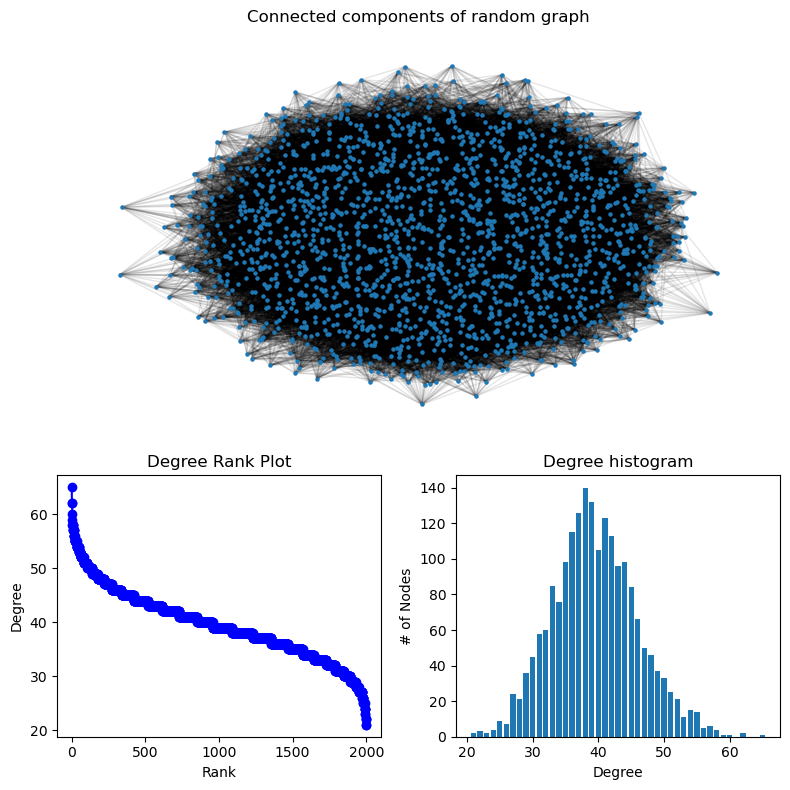

In [5]:
##random2 based on random adjacency matrix
%timeit
def randomgraph2(N, p):
    graph = nx.Graph()
    
    adj = np.random.choice([0, 1], size = (N,N), p = [1-p, p])
    np.fill_diagonal(adj,0) #no self-loop
    
    graph = nx.from_numpy_array(adj)
    
    return graph

G = randomgraph2(2000, 0.01)
graph_distribution_info(G, 'random graph')

## Regular lattice graph

Max Degree of a rl = 6
Average Degree of a rl = 6.0
Variance of a Degree destribution = 0.0


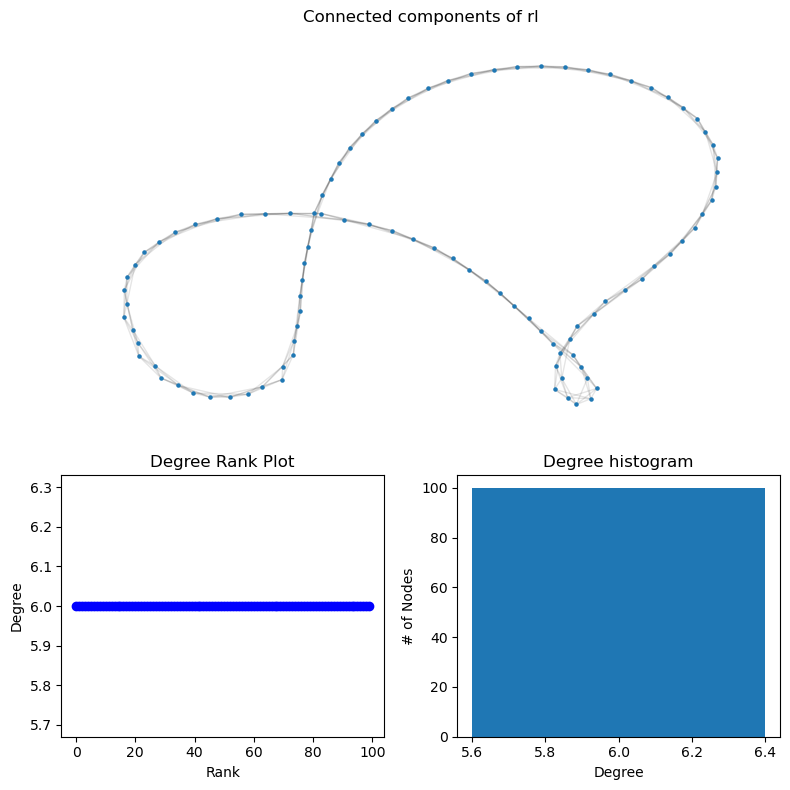

In [6]:
def regular_lattice_graph(N, k):
    nodes = list(range(N))
    graph = nx.Graph()
    
    for i in range(N):
        for j in range(1, k//2 + 1):
            graph.add_edge(i, (i+j)%N)
            graph.add_edge(i, (i-j)%N)
            
    return graph

rl = regular_lattice_graph(100, 6)
graph_distribution_info(rl, 'rl')

## Watts-Strogatz model

Max Degree of a rl = 8
Average Degree of a rl = 4.0
Variance of a Degree destribution = 1.373


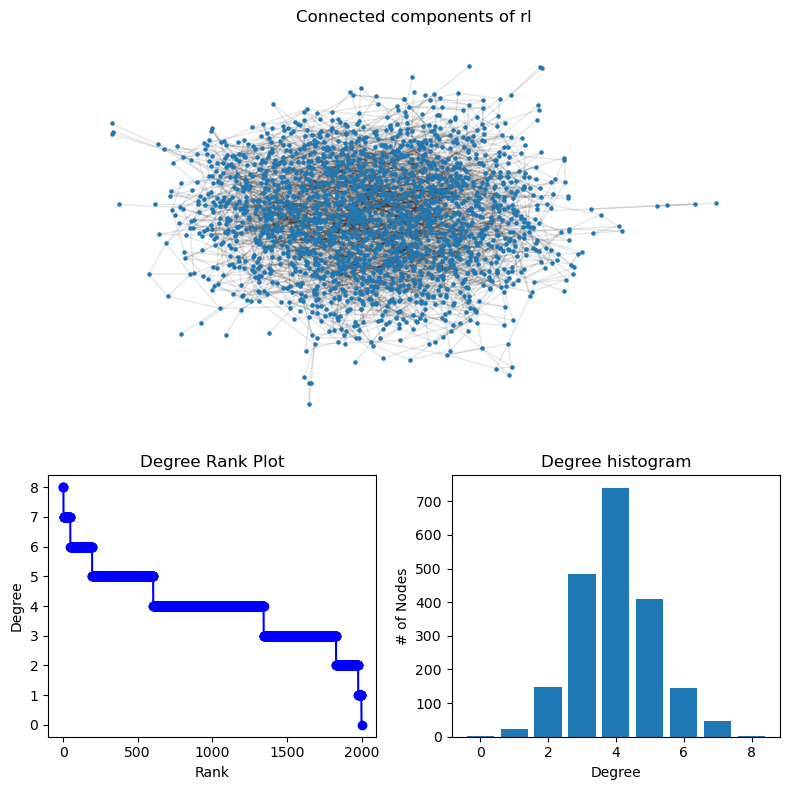

Max Degree of a rl = 8
Average Degree of a rl = 4.0
Variance of a Degree destribution = 0.716


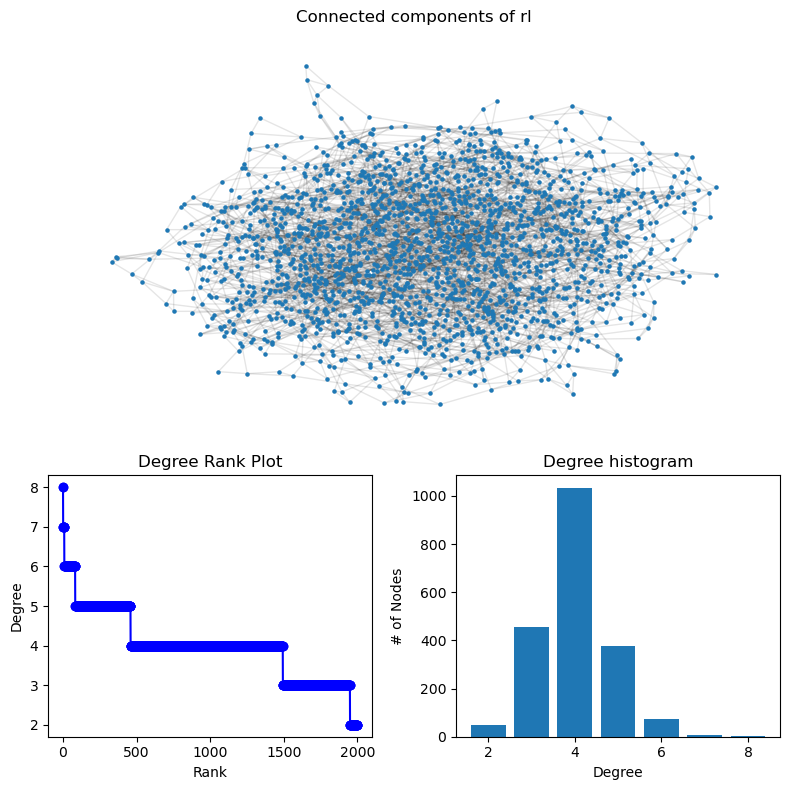

In [7]:
def watts_strogatz_graph(N, k, p):
    graph = regular_lattice_graph(N, k)
    
    for node in graph.nodes():
        for neighbor in list(graph.neighbors(node)):
            if random.random() < p:
                new_neighbor = random.choice(list(graph.nodes()))
                while new_neighbor in graph.neighbors(node) or new_neighbor == node:
                    new_neighbor = random.choice(list(graph.nodes()))
                graph.remove_edge(node, neighbor)
                graph.add_edge(node, new_neighbor)
        
    
    return graph

ws = watts_strogatz_graph(2000, 4, 0.2)
ws1 = nx.watts_strogatz_graph(2000, 4, 0.2)

graph_distribution_info(ws, 'rl')
graph_distribution_info(ws1, 'rl')

## Barabasi Alberts

Max Degree of a bal = 239
Average Degree of a bal = 39.2
Variance of a Degree destribution = 922.446


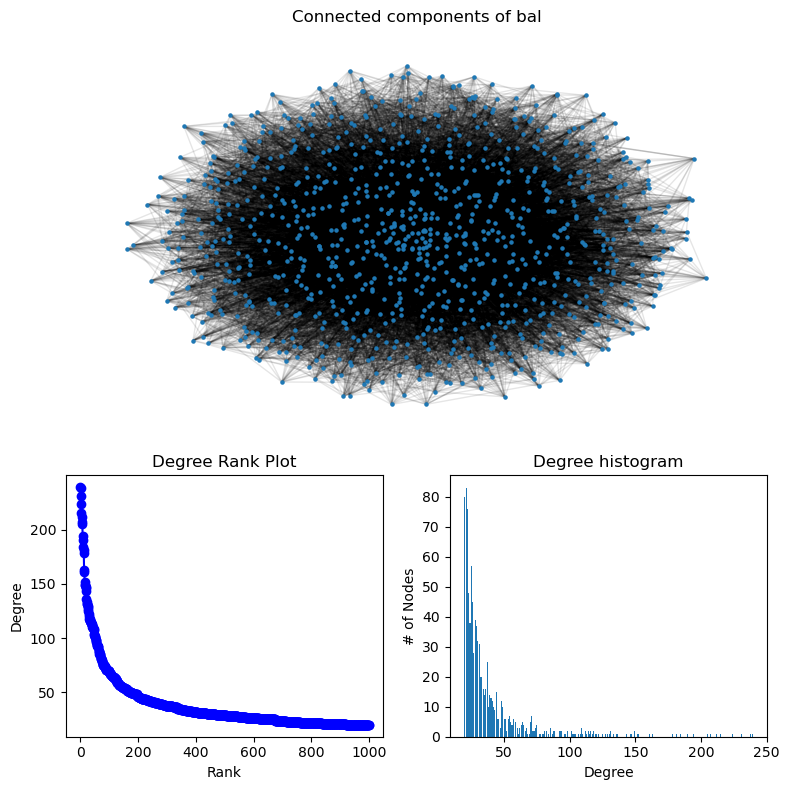

In [8]:
##networkx

ba1 = nx.barabasi_albert_graph(1000, 20)
graph_distribution_info(ba1, 'bal')

Max Degree of a ba = 65
Average Degree of a ba = 30.34
Variance of a Degree destribution = 161.52439999999996


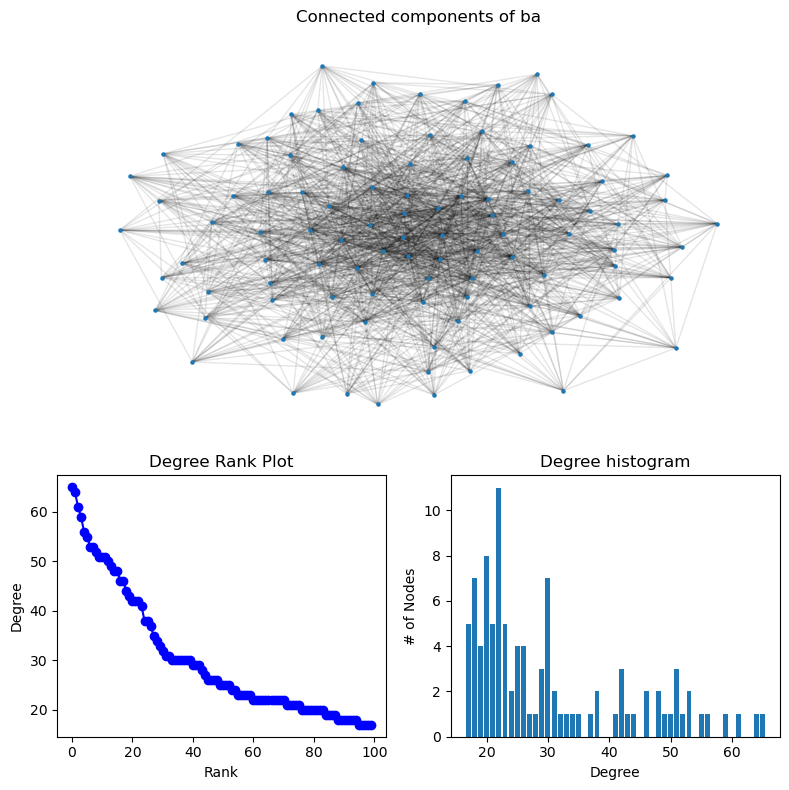

In [9]:
def barabasi_albert(n, m):
    """
    Generates a scale-free network using the Barabási-Albert model.

    :param n: The number of nodes in the graph.
    :param m: The number of edges to attach from a new node to existing nodes.
    :return: A NetworkX graph object representing a scale-free network.
    """
    # Initialize a graph with m+1 nodes.
    graph = nx.complete_graph(m+1)

    # Create the remaining n-m-1 nodes and add them to the graph.
    for i in range(m+1, n):
        # Choose m nodes at random from the existing nodes, with probability proportional to their degree.
        nodes = list(graph.nodes())
        probs = [graph.degree(node) for node in nodes]
        chosen = random.choices(nodes, weights=probs, k=m)
        # Add edges from the new node to the chosen nodes.
        for node in chosen:
            graph.add_edge(i, node)

    return graph

ba = barabasi_albert(100, 20)
graph_distribution_info(ba, 'ba')